In [191]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error ,mean_absolute_error
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [192]:
data = pd.read_csv("rideshare_kaggle.csv")
data.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [194]:
data_types = data.columns.groupby(data.dtypes)
for key , values in data_types.items():
    print(key,values.tolist())

int64 ['hour', 'day', 'month', 'windGustTime', 'temperatureHighTime', 'temperatureLowTime', 'apparentTemperatureHighTime', 'apparentTemperatureLowTime', 'windBearing', 'uvIndex', 'sunriseTime', 'sunsetTime', 'uvIndexTime', 'temperatureMinTime', 'temperatureMaxTime', 'apparentTemperatureMinTime', 'apparentTemperatureMaxTime']
float64 ['timestamp', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility', 'temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow', 'dewPoint', 'pressure', 'cloudCover', 'visibility.1', 'ozone', 'moonPhase', 'precipIntensityMax', 'temperatureMin', 'temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax']
object ['id', 'datetime', 'timezone', 'source', 'destination', 'cab_type', 'product_id', 'name', 'short_summary', 'long_summary', 'icon']


In [195]:
# data['year'] = pd.to_datetime(data['datetime']).dt.year

In [196]:
# drop unwanted columns
drop_list = ['id', 'datetime', 'timezone',"long_summary", "timestamp"]
data.drop(columns=drop_list, inplace=True)

In [197]:
data.shape

(693071, 52)

In [198]:
data.duplicated().sum()

78063

In [199]:
# Drop duplicates and na
data.isnull().sum()
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

In [200]:
numerical_features = data.select_dtypes(exclude="O")
categorical_features = data.select_dtypes(include="O")
numerical_features.nunique()
categorical_features.nunique()


source           12
destination      12
cab_type          2
product_id       12
name             12
short_summary     9
icon              7
dtype: int64

#### Creating clusters using K_means

In [201]:
# Dropping features for culstering 
drop_list_for_clustering = ['hour', 'day', 'month','cab_type', 'product_id', 'name','price']
df = data.drop(columns=drop_list_for_clustering)
df = pd.get_dummies(data=df,drop_first=True)

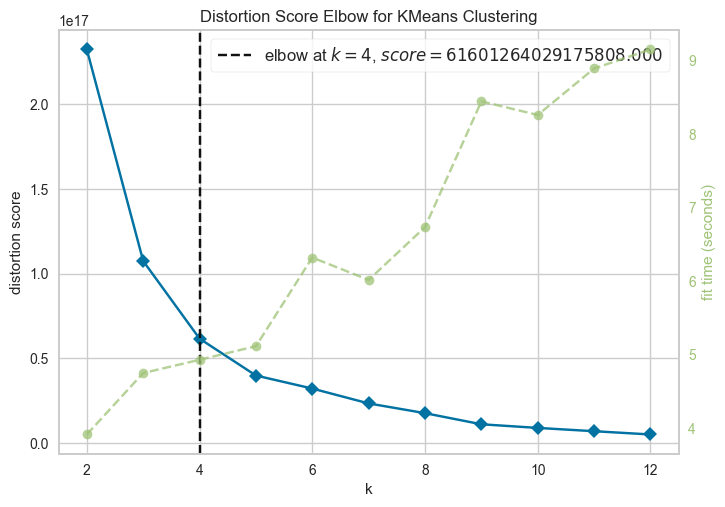

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [202]:
# Elbow Method and Silhouette Analysis
# The most commonly used techniques for choosing the number of Ks are the Elbow Method and the Silhouette Analysis.

model = KMeans(random_state=42)
elb_visualizer = KElbowVisualizer(model, k=(2,13))
elb_visualizer.fit(df)    
elb_visualizer.show()  


In [203]:
# Getting clustered labels

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df)
cluster_labels = kmeans.labels_


model_4clust = KMeans(n_clusters = 4, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(df)    
sil_visualizer.show()

In [ ]:
# df is a Clustered data  assigned each data point (location) to one of the 4 clusters, you can treat the cluster assignments as a new feature in your dataset. Dropped features ['hour', 'day', 'month','cab_type', 'product_id', 'name','price'] for clustering
# data is the original data with all the data above

#### Price prediction using the Clustered data

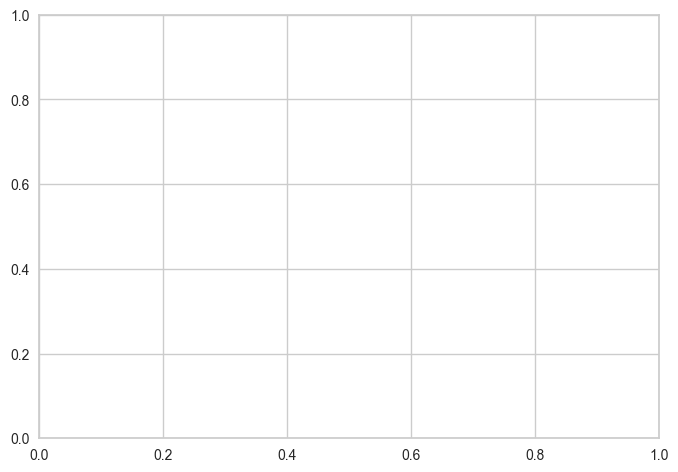

In [205]:
data_clustered = pd.get_dummies(data=data,drop_first=True)

data_clustered["cluster_labels"] = cluster_labels

X = data_clustered.drop(columns="price")
y = data_clustered["price"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [206]:

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Make predictions using the selected components
y_pred = regression_model.predict(X_test)

mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)

print(f"MSE_clustered_data: {mse}, MAEMSE_clustered_data : {mae}")

MSE_clustered_data: 6.417342542196145, MAEMSE_clustered_data : 1.7870166776300238


### PRICE PREDICTION 

In [207]:
data = pd.get_dummies(data=data,drop_first=True)

X = data.drop(columns="price")
y = data["price"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### Price prediction using the Unclustered data
    - using PCA

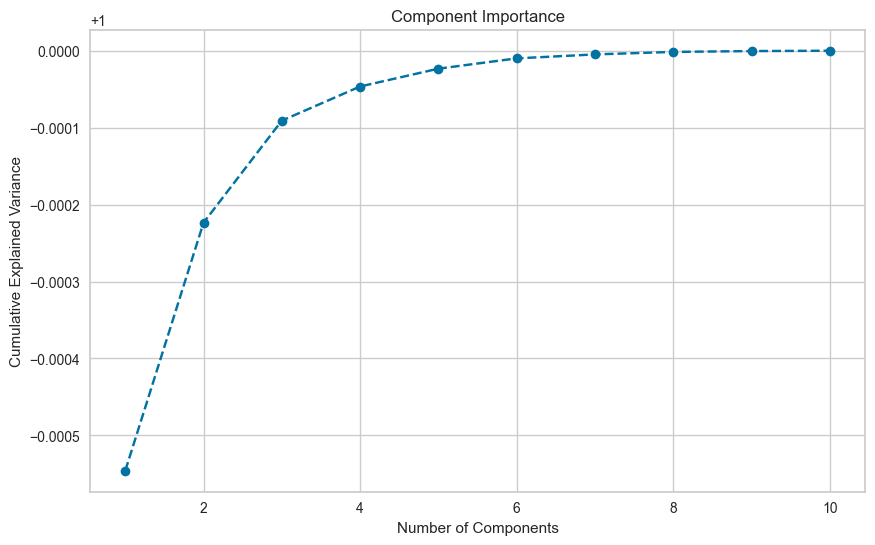

In [208]:
# Instantiate PCA with the desired number of components
n_components = 10  # Choose the number of components you want to keep
pca = PCA(n_components=n_components)

# Fit PCA on your feature matrix
pca.fit(X=X_train)

# Transform the feature matrix to the lower-dimensional space
X_train_pca = pca.transform(X=X_train)
X_test_pca = pca.transform(X=X_test)

# Access the explained variance ratio of each component
explained_variance_ratio = pca.explained_variance_ratio_

# Access the singular values of each component
singular_values = pca.singular_values_

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the component importance graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Component Importance')
plt.grid(True)
plt.show()


In [209]:
# Choose the number of components to use in the regression
n_selected_components = 3  

# Select the top 'n_selected_components' components based on explained variance
X_train_selected_components = X_train_pca[:, :n_selected_components]
X_test_selected_components = X_test_pca[:, :n_selected_components]

# Fit a linear regression model on the selected components
regression_model = LinearRegression()
regression_model.fit(X_train_selected_components, y_train)

# Make predictions using the selected components
y_pred = regression_model.predict(X_test_selected_components)

mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
print(f"MSE_Unclustered_data_PCA_used : {mse}, MAE_Unclustered_data_PCA_used : {mae}")

MSE_Unclustered_data_PCA_used : 88.56923650946734, MAE_Unclustered_data_PCA_used : 7.654321349439427


#### Price prediction using the Unclustered data
    - without PCA

In [210]:
# Fit a linear regression model on the selected components
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Make predictions using the selected components
y_pred = regression_model.predict(X_test)

mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
print(f"MSE_Unclustered_data : {mse}, MAE_Unclustered_data: {mae}")

MSE_Unclustered_data : 6.417262364636687, MAE_Unclustered_data: 1.7870058648917804


### Plot Graph :

In [216]:
import folium


# Create a map object
map = folium.Map( zoom_start=10)

# Add markers for locations with pop-up information
for index, row in data.iterrows():
    location = [row['latitude'], row['longitude']]
    popup_info = f"Location: {[row['latitude'], row['longitude']]}<br>Price: {row['price']}"

    # Create a marker with pop-up information
    marker = folium.Marker(location=location, popup=popup_info)

    # Add the marker to the map
    marker.add_to(map)

# Display the map
map
